In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plots import plot_estSplice_results as plot
import marimo

/tmp/ipykernel_1543645/398820702.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/398820702.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/398820702.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/398820702.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/398820702.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


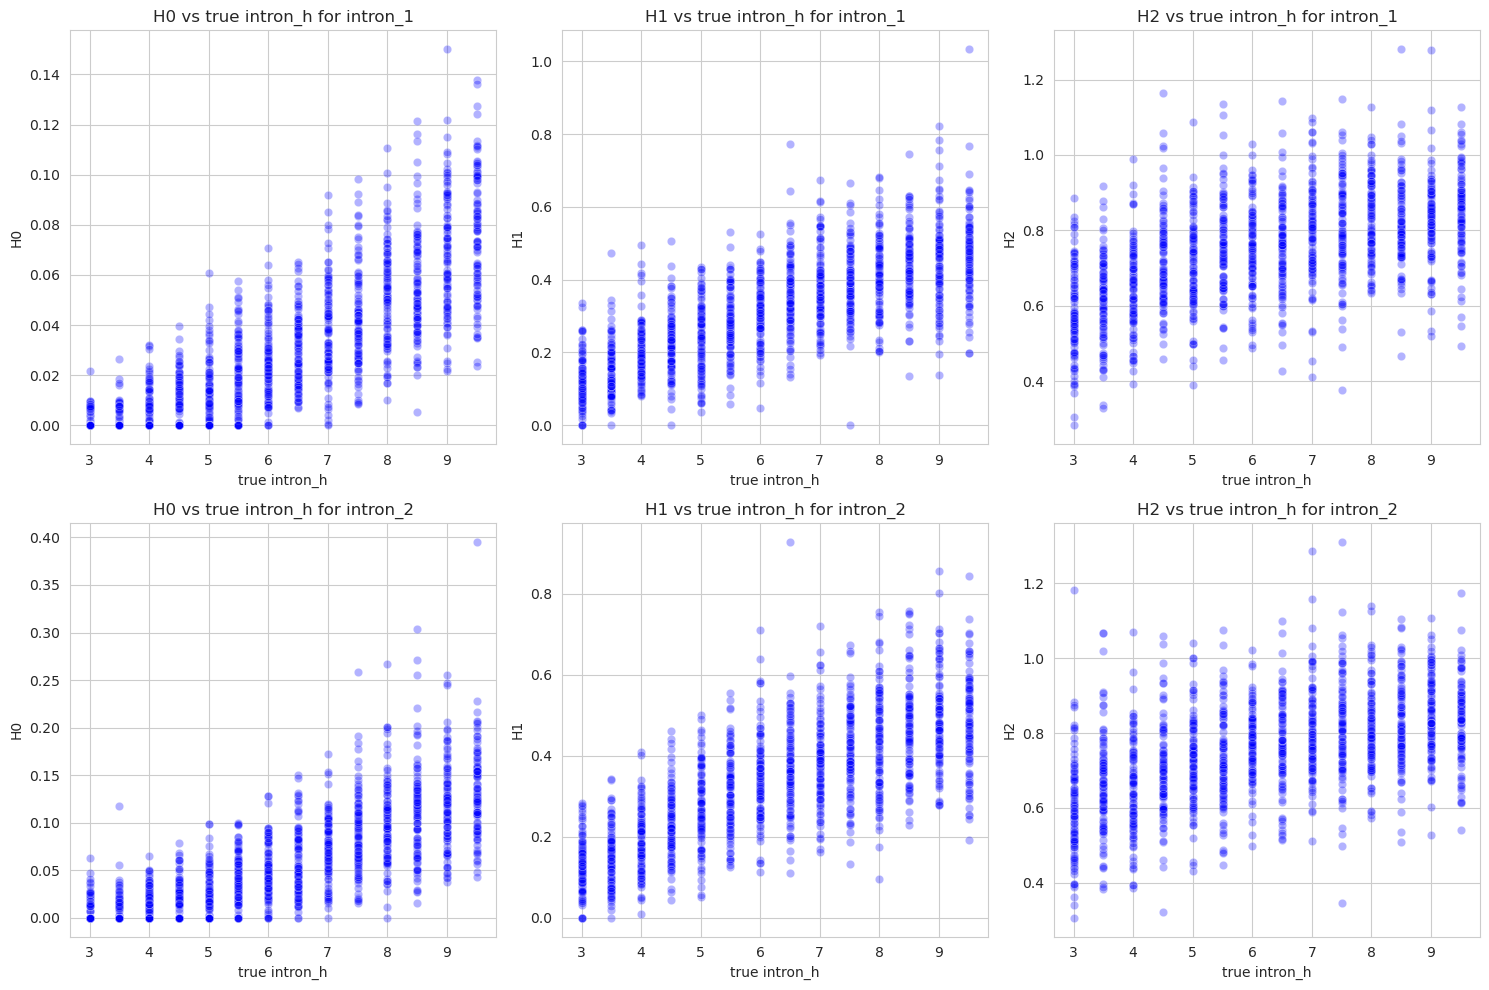

In [7]:
import importlib
importlib.reload(plot)
output_folder = './splice_est/plotH'

intron1_df = plot.get_result_df(output_folder, intronidx_to_vary=1)
intron2_df = plot.get_result_df(output_folder, intronidx_to_vary=3)
df_list = [intron1_df, intron2_df]
# for each intron, plot the H0 H1 H2 for different values of ground-truth splicing half-life
# create a plot with 2 rows and 3 columns
# each row is a different intron
# each column corresponds to H1, H2, H3
# the x-axis is the ground-truth splicing half-life
# the y-axis is the values of H1 H2 H3. We would expect a positive correlation between the ground-truth splicing half-life and the values of H1 H2 H3
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
for intron_index, df in enumerate(df_list):
    plot_df = df[df['feature'] == f'intron_{intron_index+1}']
    for colI, h in enumerate(['H0', 'H1', 'H2']):
        ax = axes[intron_index, colI]
        # line plot but with data points highlighted as solid points
        # sns.lineplot(x='intron_h', y=h, data=plot_df, ax=ax)
        sns.scatterplot(x='intron_h', y=h, data=plot_df, color='blue', ax=ax, alpha=0.3)
        ax.set_title(f'{h} vs true intron_h for intron_{intron_index+1}')
        ax.set_xlabel('true intron_h')
        ax.set_ylabel(h)    
        plt.tight_layout()
# plt.savefig(f'{output_folder}/H_vs_true_intron_h.png')

/tmp/ipykernel_1543645/3577102696.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/3577102696.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/3577102696.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/3577102696.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1543645/3577102696.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


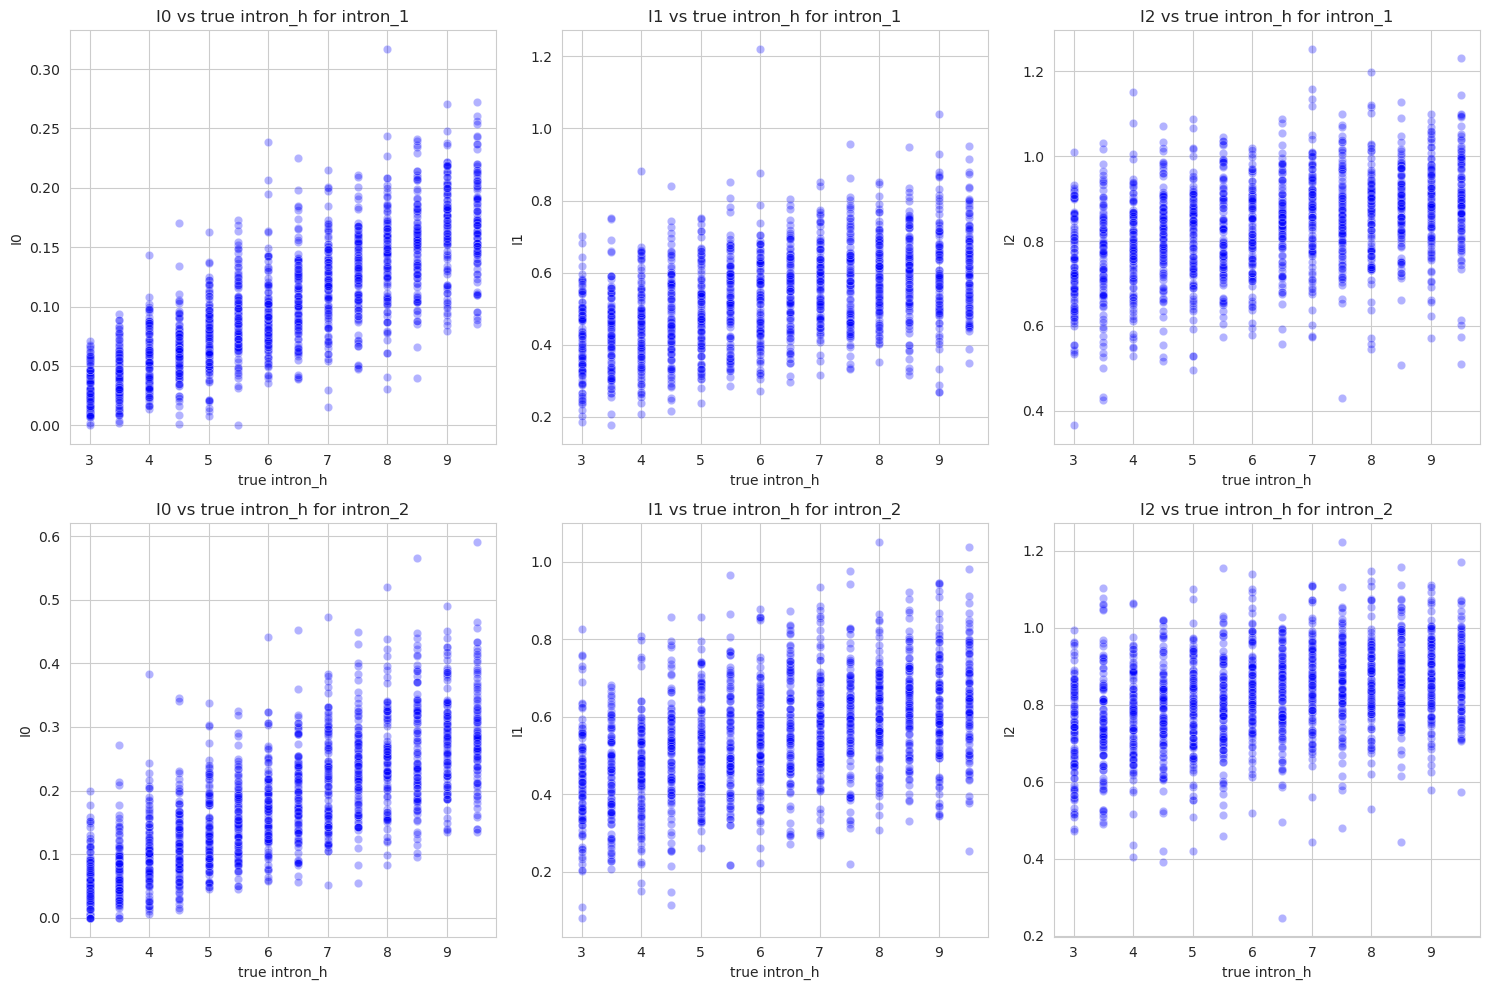

In [8]:
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
for intron_index, df in enumerate(df_list):
    plot_df = df[df['feature'] == f'intron_{intron_index+1}']
    for colI, h in enumerate(['I0', 'I1', 'I2']):
        ax = axes[intron_index, colI]
        # line plot but with data points highlighted as solid points
        # sns.lineplot(x='intron_h', y=h, data=plot_df, ax=ax)
        sns.scatterplot(x='intron_h', y=h, data=plot_df, color='blue', ax=ax, alpha=0.3)
        ax.set_title(f'{h} vs true intron_h for intron_{intron_index+1}')
        ax.set_xlabel('true intron_h')
        ax.set_ylabel(h)    
        plt.tight_layout()

In [1]:
# for a particular run, plot the H0,1,2 ratios for different values of ground-truth splicing half-life as different lines. The color of the lines corresponds to the values of the ground-truth splicing half-life
# the x-axis corresponds to H0, H1, H2
# the y-axis is the values of the ratios
t = intron1_df[intron1_df['feature'] == 'intron_1']
intron_h_list = np.sort(t['intron_h'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(intron_h_list)))
# plot the weibull distribution for each length, all on the same plot such that the color of the line corresponds to the length of the molecule
color_dict = {intron_h: color for intron_h, color in zip(intron_h_list, colors)}
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ixd, row in t.iterrows():
    axes[0].plot([0,1,2], row[['H0','H1','H2']], color=color_dict[row['intron_h']], lw=2, alpha=0.3)
# now we will only plot the average values and standard deviation of H0, H1, H2 for each intron_h
mean_df = t.groupby('intron_h')[['H0', 'H1', 'H2']].mean().reset_index()
std_df = t.groupby('intron_h')[['H0', 'H1', 'H2']].std().reset_index()
for ixd, row in mean_df.iterrows():
    axes[1].plot([0,1,2], row[['H0','H1','H2']], color=color_dict[row['intron_h']], lw=2, label=row['intron_h'])
    # plot the standard deviation as error bars
    std_row = std_df[std_df['intron_h'] == row['intron_h']]
    axes[1].errorbar([0,1,2], row[['H0','H1','H2']], yerr=std_row[['H0','H1','H2']], fmt='o', color=color_dict[row['intron_h']])
plt.title('H0,1,2 for different grount-truth intron_h')
plt.xlabel('Time')
plt.ylabel('H0/1/2')
# create custom legend based on color_dict with keys as the labels
plt.legend(handles=[plt.Line2D([0], [0], color=color_dict[intron_h], lw=2, label=intron_h) for intron_h in intron_h_list])
plt.show()

NameError: name 'intron1_df' is not defined

In [2]:
import os

import numpy as np
import scipy
import seaborn as sns
from transcription.experiment import Experiment
from transcription import simulate_multiple_experiments as sim
import visualize_simulations as viz
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
import helper
import estimate_elongation as estElong
import pandas as pd 
ONE_KB=1000
SEED = 9999
np.random.seed(SEED)

importing simulate_multiple_experiments


In [3]:
target_exp = 5
num_total_transcript_millions = 100
degrade_rate = 0.00
intron_h = 5
PAS_h=5
RTR=500
lambda_init = 2 # average number of burst events per minute (burst event is the event where a burst_size transcripts are created around the same time)
burst_size = 10 # number of transcripts created in a burst event
wiggle_room = 0.3 # the wiggle room for the burst event. See the comments in function Experiment.init_bursting_transcripts to understand the meaning of this parameter. If not sure, don't modify it.
# if I want to simulate situation such that there is no read being generated from fragments (only the whole transcripts are sequenced), the following parameters should be set carefully:
eta_val=helper.DFT_ETA_VALUE  # the scale fo weibull distribution for the fragment length
insertsize_min = -1  #filter fragments minimum length
insertsize_max = -1  # filter fragments maximum length
read_length = -1 # the length of the reads
frag_func= 'weibull_edge' # whether we will simulate the fragmentation of transcripts based on the weibull distribution or the uniform fragmentation method
unif_avg_frag_len=250 # the desired average fragment length if we use the uniform fragmentation method
# if I set the read values to -1, the program will just generate fragments and not get rid of any portion of the fragments.
simulate_cleavage=False ## for this problem, we don't need to simulate cleavage because we really only care about calculating the elongation speed of the transcripts. We skip splicing and cleavage for now.
PDB = False  # whether we simulate a system where there is no existing transcripts, and instead we used PDB to stop the transcripts from elongation, and let the elongation to start PDB_time minutes before we introduce the first tag
label_time = np.arange(4) if PDB else np.arange(3)
time_interval=5
label_time = time_interval*label_time
num_timepoints = len(label_time)
max_time_for_equilibrium = 50
save_folder = None # './situ1/'


In [4]:
gtf_df = sim.create_variable_gtf_df(nExons=2, elong_fold_list = [1,1,1], length_fold_list = [5,5,5], intronH_fold_list=[0,5,0], SIM_FEAT_LEN=ONE_KB)
print(gtf_df)
exp_list = sim.generate_exp_given_one_gtf(gtf_df, save_folder= save_folder, label_time = label_time, target_exp=target_exp, num_total_transcript_millions = num_total_transcript_millions, lambda_init = lambda_init , burst_size = burst_size, wiggle_room = wiggle_room,eta_val=eta_val, insertsize_min=insertsize_min, insertsize_max=insertsize_max, read_length=read_length, simulate_cleavage=simulate_cleavage, PDB=PDB, max_time_for_equilibrium=max_time_for_equilibrium, frag_func=frag_func)


    feature  start    end  length  txrate  is_intron  intron_h  is_PAS  PAS_h  \
0    exon_1      0   5000    5000     1.0      False       0.0   False    0.0   
1  intron_1   5000  10000    5000     1.0       True       5.0   False    0.0   
2    exon_2  10000  15000    5000     1.0      False       0.0   False    0.0   
3       PAS  15000  15001       1     1.0      False       0.0    True    1.0   
4       RTR  15001  20001    5000     1.0      False       0.0   False    0.0   

    time  
0  5.000  
1  5.000  
2  5.000  
3  0.001  
4  5.000  
inside generate_exp_given_one_gtf
before adding new experiments
350
500
630


In [4]:
exp_list = sim.read_one_exp_sequence(save_folder, num_exp=3)

TypeError: expected str, bytes or os.PathLike object, not NoneType

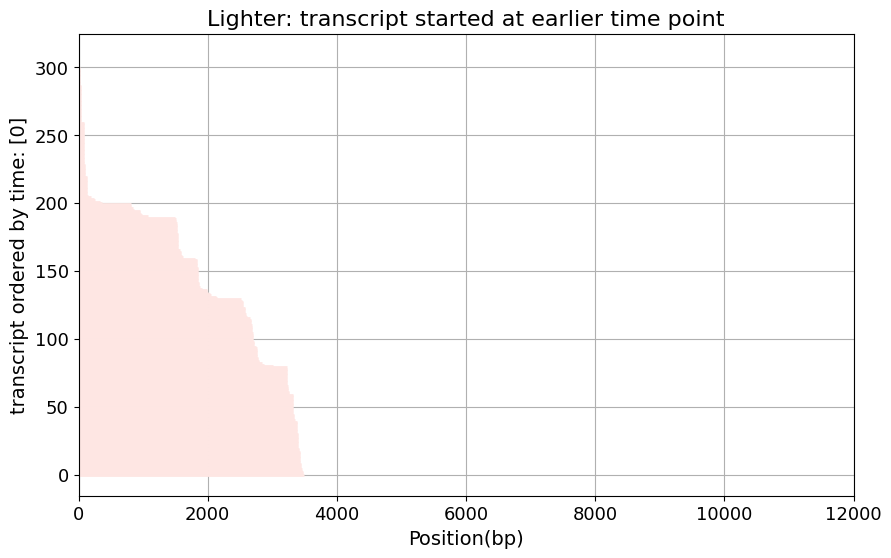

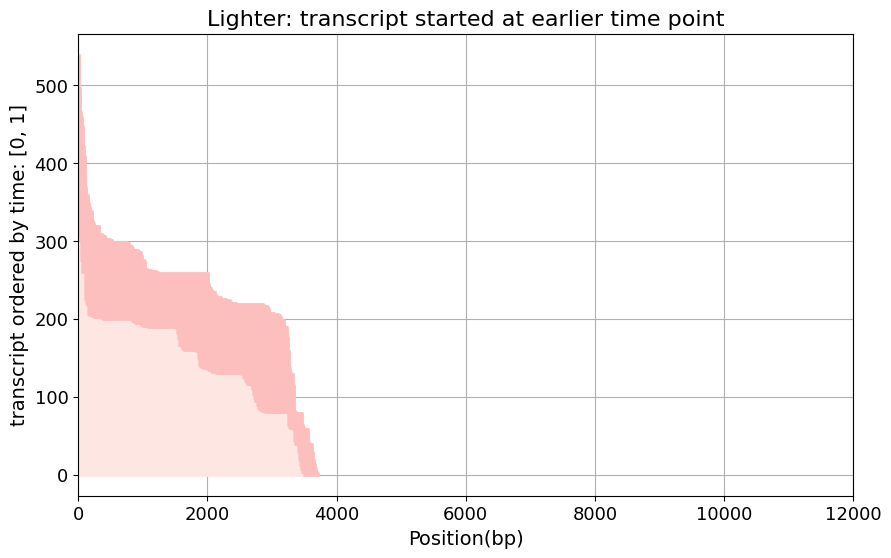

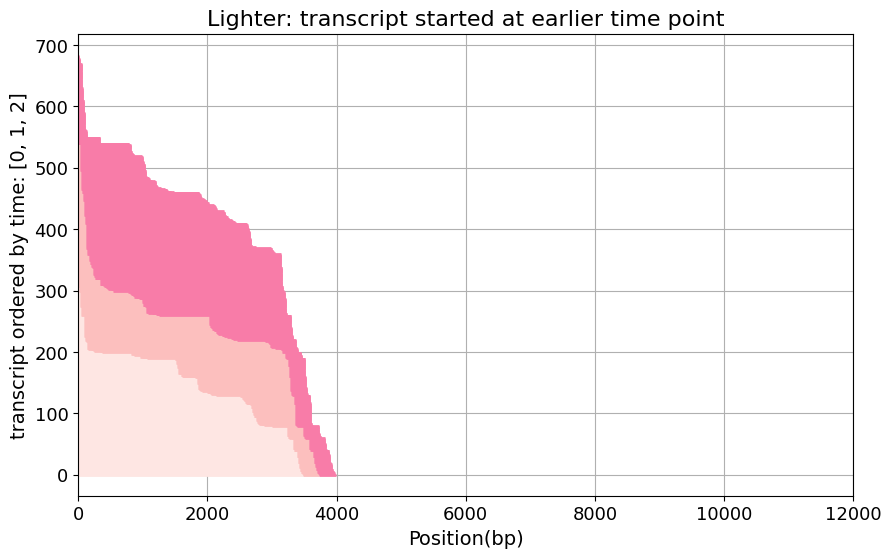

In [5]:
for i in range(len(exp_list)):
    # coverage_df = viz.plot_timeTagged_read_coverage(exp_list[:(i+1)], smooth_N=1, gap_N=200, xaxis_N=50, width=1, stacked=False, ylim=(0,300), time_to_plot=range(i,i+1)
    viz.plot_all_times_endsite(exp_list[:(i+1)], lower_idx=0, upper_idx=1500, line_width=2, y_order_by_time=False, xlim=(0,12000))

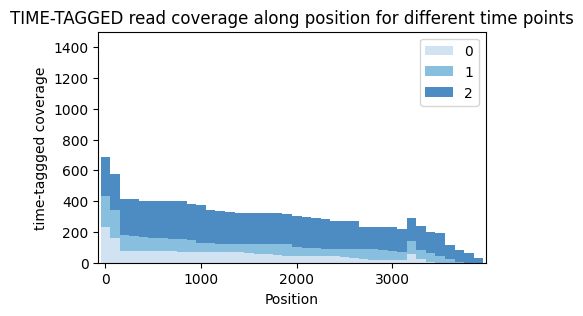

In [6]:
import importlib
importlib.reload(viz)
coverage_df = viz.plot_timeTagged_read_coverage(exp_list, smooth_N=1, gap_N=100, xaxis_N=10, width=1, stacked=True, ylim=(0,1500), xlim=(0,12000), time_to_plot=[0,1,2])

In [5]:
endpoint_df = viz.get_endpoints_across_time(exp_list)
coverage_df = viz.count_timeDep_read_coverage(exp_list[-1], endpoint_df, N=1, num_timepoints=len(exp_list))

In [8]:
import evaluate_splicing as eSplice
importlib.reload(eSplice)
result_df = eSplice.calculate_spliceH_given_coverage_df(coverage_df, gtf_df, endT_idx=2)

/gladstone/engelhardt/home/hvu/source/RNA_rates/splicingrates/simulations/regression/piecewise_linear_regression.py:45: RuntimeWarning: Mean of empty slice.
  py = np.array([Y[np.abs(X-x)<=1].mean() for x in px]) #np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.1].mean() for x in px])
/gladstone/engelhardt/home/hvu/anaconda3/envs/rna_rate/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
result_df

,feature,start,end,length,txrate,is_intron,intron_h,is_PAS,PAS_h,time,h_0,h_1,h_2,h_all,h_comb,h_comb_and_all
0,exon_1,0,140,140,0.03,False,0.0,False,0.0,4.666667,NaN,NaN,NaN,NaN,NaN,NaN
1,intron_1,140,3140,3000,0.60,True,13.0,False,0.0,5.000000,5.873704,8.637443,16.226757,9.317777,8.509605,8.860896
2,exon_2,3140,3280,140,0.05,False,0.0,False,0.0,2.800000,NaN,NaN,NaN,NaN,NaN,NaN
3,PAS,3280,3281,1,1.00,False,0.0,True,1.0,0.001000,NaN,NaN,NaN,NaN,NaN,NaN
4,RTR,3281,3531,250,0.05,False,0.0,False,0.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


endpoints: [    0.  5000. 10000. 15000. 15001.    inf]


/gladstone/engelhardt/home/hvu/source/RNA_rates/splicingrates/simulations/regression/piecewise_linear_regression.py:42: RuntimeWarning: Mean of empty slice.
  py_init = [Y[np.abs(X - x) <= 1].mean() for x in px_init]
/gladstone/engelhardt/home/hvu/anaconda3/envs/rna_rate/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


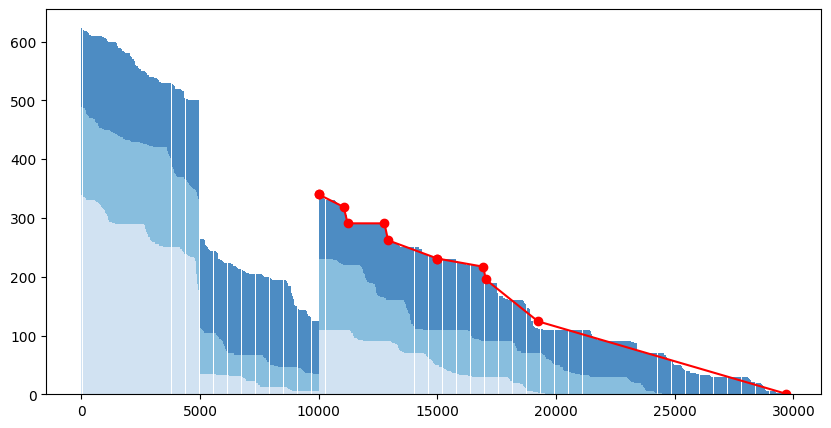

In [6]:
# draw the coverage_df, and also draw the piecewise linear regression lines from the end of the intron to the end of the gene
import importlib
importlib.reload(estElong)
import regression.piecewise_linear_regression as pwlr
importlib.reload(pwlr)
coverage_df = estElong.convert_gene_to_KB(coverage_df, convert_to_KB=False)
i=0
feature_idx= 1
startT_idx=i
endT_idx=i+1
gtf_df = exp_list[-1].gtf_df
start, end = gtf_df.iloc[feature_idx]['start'], gtf_df.iloc[feature_idx]['end']  # end of intron
culm_coverage_df = estElong.calculate_culmulative_coverage(coverage_df, startT_idx=0, endT_idx=2, gapN=1)
input_df = culm_coverage_df[culm_coverage_df['position'] >= end]
endpoints = estElong.get_endpoints_from_gtf(gtf_df, convert_to_KB=False)
print('endpoints:', endpoints)
px2, py2 = estElong.piecewise_linearRegression_no_trailing_zeroes(input_df['position'].values, input_df[2].values, endpoints = endpoints[:-1], max_segments=15)
plot_df = coverage_df.loc[::10]
cmap = sns.color_palette('Blues', n_colors=3)
colors = [cmap[i] for i in range(3)]
fig, ax = plt.subplots(figsize=(10,5))
width = 9.5
ax.bar(plot_df['position'], plot_df[0], color=colors[0], alpha=0.8, label=0, width=width)
ax.bar(plot_df['position'], plot_df[1], color=colors[1], bottom=plot_df[0], alpha=0.8, label=1, width=width)
ax.bar(plot_df['position'], plot_df[2], color=colors[2], bottom=plot_df[0]+plot_df[1], alpha=0.8, label=2, width=width)
# # plot vertical line at 3140, 3280
# ax.axvline(x=3140, color='r', linestyle='--')
# ax.axvline(x=3280, color='r', linestyle='--')
# now plot px2, py2
ax.plot(px2, py2, '-or')  # red


In [19]:
print(input_df.loc[3138:3142])
print(input_df.loc[3278:3282])
print(px2, py2)

       0    1    2  position
3140  75  182  360      3140
3141  75  182  357      3141
3142  75  182  350      3142
       0    1    2  position
3278  60  145  260      3278
3279  60  145  260      3279
3280  60  144  260      3280
3281  60  143  260      3281
3282  60  143  260      3282
[ 3140.          3140.          3280.          3281.
  4036.28195266  7121.52176691 10769.1541378  17358.        ] [358.5 358.5 260.  260.  226.  190.   80.    1. ]


In [39]:

coverage_df.loc[list(range(3140,3145))+ list(range(3275,3282))]

,0,1,2,position
3140,75,107,178,3140
3141,75,107,175,3141
3142,75,107,168,3142
3143,75,104,166,3143
3144,75,104,162,3144
3275,60,85,115,3275
3276,60,85,115,3276
3277,60,85,115,3277
3278,60,85,115,3278
3279,60,85,115,3279


In [9]:
import importlib
importlib.reload(estElong)
import regression.piecewise_linear_regression as pwlr
importlib.reload(pwlr)
coverage_df = estElong.convert_gene_to_KB(coverage_df, convert_to_KB=False)
coverage_df = estElong.clean_edgeEffect_region_from_coverage(coverage_df, trim_N=300)
i=0
feature_idx= 1
startT_idx=i
endT_idx=i+1
gtf_df = exp_list[-1].gtf_df
start, end = gtf_df.iloc[feature_idx]['start'], gtf_df.iloc[feature_idx]['end']
# filter such that input_df contains indices that are NOT in [5000,10000] and NOT in [15000,20000]
culm_coverage_df = estElong.calculate_culmulative_coverage(coverage_df, startT_idx=0, endT_idx=2, gapN=1)

input_df = culm_coverage_df[~((culm_coverage_df['position'] >= 5000) & (culm_coverage_df['position'] < 15000))]
px0, py0 = estElong.piecewise_linearRegression_no_trailing_zeroes(input_df['position'].values, input_df[0].values, max_segments=15)
px1, py1 = estElong.piecewise_linearRegression_no_trailing_zeroes(input_df['position'].values, input_df[1].values, max_segments=15)
px2, py2 = estElong.piecewise_linearRegression_no_trailing_zeroes(input_df['position'].values, input_df[2].values, max_segments=15)

exp = exp_list[-1]
juncReads_df = exp.get_ee_junction_df(with_tagged_time = True, endpoint_df = endpoint_df)  # each item corresponds to a ee read.
# columns of interest: 'read_index', 'feature', 'tagged_time', 'intron', 'end_at_0', 'end_at_1', 'end_at_2', etc.
# the above function call will create exp.juncReads_df
from transcription import junction_reads as juncreads
coverage_df_noS = juncreads.get_coverage_noSplice_given_juncReads_df(coverage_df, juncReads_df)
plot_df = coverage_df_noS.loc[::10]
cmap = sns.color_palette('Blues', n_colors=3)
colors = [cmap[i] for i in range(3)]
fig, ax = plt.subplots(figsize=(10,5))
width = 9.5
print(plot_df.head())
ax.bar(plot_df['position'], plot_df[0], color=colors[0], alpha=0.8, label=0, width=width)
ax.bar(plot_df['position'], plot_df[1], color=colors[1], bottom=plot_df[0], alpha=0.8, label=1, width=width)
ax.bar(plot_df['position'], plot_df[2], color=colors[2], bottom=plot_df[0]+plot_df[1], alpha=0.8, label=2, width=width)
#plot the area between the two regression line
# x_common = np.union1d(px0, px1)
# # Interpolate y values for this common x array
# py0_interp = np.interp(x_common, px0, py0)
# py1_interp = np.interp(x_common, px1, py1)
# ax.plot(x_common, py0_interp, label='Line 1')
# ax.plot(x_common, py1_interp, label='Line 2')
# ax.fill_between(x_common, py0_interp, py1_interp, color='s
# kyblue', alpha=0.2)
ax.plot(px0, py0, '-or')  # red
ax.plot(px1, py1, '-or')  # red
ax.plot(px2, py2, '-or')  # red
# ax.plot(x0, y0, '-or', color='green', alpha=0.1)
# ax.plot(x1, y0, '-or', color='green', alpha=0.1)
# if xlim is not None:
#     ax.set_xlim(xlim)

KeyError: 'position'

In [10]:
# if I add the ee reads to each color in the intron, would it recover my ground-truth?
exp = exp_list[-1]
juncReads_df = exp.get_ee_junction_df(with_tagged_time = True, endpoint_df = endpoint_df)  # each item corresponds to a ee read.
# columns of interest: 'read_index', 'feature', 'tagged_time', 'intron', 'end_at_0', 'end_at_1', 'end_at_2', etc.
# the above function call will create exp.juncReads_df
from transcription import junction_reads as juncreads
coverage_df_noS = juncreads.get_coverage_noSplice_given_juncReads_df(coverage_df, juncReads_df)

print ('Done with the calculation step')
# plot two figures side by side, one is the coverage_df_noS, the other is the coverage_df
fig, axes = plt.subplots(1, 2, figsize=(15,5))
cmap = sns.color_palette('Blues', n_colors=3)
colors = [cmap[i] for i in range(3)]
width = 9.5
for time_idx in range(3):
    ax = axes[0]
    plot_df = (coverage_df_noS.loc[::10]) # we do not need to plot every datapoints
    ax.bar(plot_df['position'], plot_df[0], color=colors[0], alpha=0.8, label=0, width=width)
    ax.bar(plot_df['position'], plot_df[1], color=colors[1], bottom=plot_df[0], alpha=0.8, label=1, width=width)
    ax.bar(plot_df['position'], plot_df[2], color=colors[2], bottom=plot_df[0]+plot_df[1], alpha=0.8, label=2, width=width)
    ax.set_title('coverage_df_noS')
    ax.set_xlabel('position')
    ax.set_ylabel('coverage')
    ax.legend()
    ax = axes[1]
    plot_df = (coverage_df.loc[::10]) # we do not need to plot every datapoints
    ax.bar(plot_df['position'], plot_df[0], color=colors[0], alpha=0.8, label=0, width=width)
    ax.bar(plot_df['position'], plot_df[1], color=colors[1], bottom=plot_df[0], alpha=0.8, label=1, width=width)
    ax.bar(plot_df['position'], plot_df[2], color=colors[2], bottom=plot_df[0]+plot_df[1], alpha=0.8, label=2, width=width)
    ax.set_title('coverage_df')
    ax.set_xlabel('position')
    ax.set_ylabel('coverage')
    ax.legend()

NameError: name 'endpoint_df' is not defined

In [21]:
# implement an iterative procedure to calculate the elongation rate given coverage_df_noS data. 
# First, piece-wise linear regression on coverage_df_noS at 0,1,2
import importlib
importlib.reload(estElong)
culm_coverage_df_noS = estElong.calculate_culmulative_coverage(coverage_df_noS, startT_idx=0, endT_idx=2, gapN=1)
coverage_df_no_intron = coverage_df[~((coverage_df['position'] >= 5000) & (coverage_df['position'] < 10000))]
input_df = coverage_df_no_intron
# px0, py0, px1, py1, x0_, x1_1, _ = estElong.estimate_endpoints_acrossTime(input_df, startT_idx=0, endT_idx=1, max_segments=15, gapN=1)
# px1, py1, px2, py2, x1_2, x2_, _ = estElong.estimate_endpoints_acrossTime(input_df, startT_idx=1, endT_idx=2, max_segments=15, gapN=1)
# Then, calculate elongation rate for each feature
h, h_mean = estElong.calculate_h_from_coverage(coverage_df_noS, gtf_df, startT_idx=0, endT_idx=2, time=5, max_segments=15, trim_N=300, trim_endGene=True, subsample_frac=0.3, SEED=9999, nIter=1, convert_to_KB=True, gapN=1)
gtf_df['pred_e'] = h_mean[:-1]
# now given the h_mean, we will recalculate the time-tagged endpoint of the junction reads

We will conver the genomic positions in terms of kilo-bases
Output will be in KB/min
Start calculating elongation rate
fixed. py[i] - curr_y:  0.7417893054574449
py[i]:  183.35284529425542
curr_y:  182.61105598879797
Done getting the piece-wise linear regression
endpoints: [ 0.     5.    10.    15.    15.001    inf]
Done subsampling x0 and x1
Done solving the elongation rate problem
Out of 1 iterations, 1 iterations produced valid (no nan at all) longation rates


In [12]:
coverage_df

,0,1,2,position
0,339,150,135,0
1,339,150,135,1
2,339,150,135,2
3,339,150,134,3
4,339,150,134,4
...,...,...,...,...
29676,0,0,1,29676
29677,0,0,1,29677
29678,0,0,1,29678
29679,0,0,1,29679


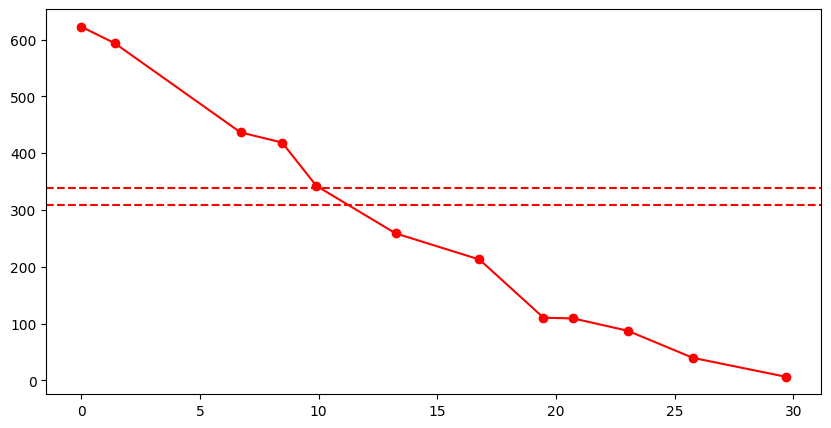

In [9]:
 # now find the horizontal lines along which we will recalculate time-tagged coverage for junction reads
intron_start = gtf_df.iloc[1]['start']
culm_coverage_df_noS = estElong.calculate_culmulative_coverage(coverage_df_noS, startT_idx=0, endT_idx=2, gapN=1)
juncCount_df = exp.count_junction_reads(with_tagged_time=True, endpoint_df=endpoint_df)
upper_horizon = culm_coverage_df_noS.loc[intron_start, 2] - coverage_df.loc[intron_start, 2] 
num_splicedout_reads = juncCount_df[(juncCount_df['feature'] == 'intron_1') & (juncCount_df['tagged_time'] == 2)]['ee_reads'].sum()
lower_horizon = upper_horizon - num_splicedout_reads
# given the lower and upper horizon, we shall calculate where the px1,py1 intersect with the horizontal lines within the range of the horizontal horizon. Then we will update the reads in juncReads_df accordingly
px2, py2 = estElong.piecewise_linearRegression_no_trailing_zeroes(culm_coverage_df_noS['position'].values, culm_coverage_df_noS[2].values, max_segments=15)

# now, given py2, px2, find the x-values of the intersection points between the horizontal lines and lines intercepting px2,py2
from transcription.transcripts import calculate_startsite_given_pred_h
import regression.piecewise_linear_regression as pwlr
xs2_intersect = pwlr.y_to_x_array(np.arange(int(lower_horizon), int(upper_horizon)), px2, py2)
xs1_intersect = list(map(lambda x: calculate_startsite_given_pred_h(x, gtf_df, e_colname='pred_e', time_since_prev=5), xs2_intersect))
# given the points in previous steps, calculate the step site of the previous tim epoint
# plot px2,py2
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(px2, py2, '-or')  # red
ax.axhline(y=upper_horizon, color='r', linestyle='--')
ax.axhline(y=lower_horizon, color='r', linestyle='--')



In [22]:
# do nothing about junction reads tagged at t=0
# for junction reads tagged at 
print(h_mean)

[0.8290903  2.68813461 1.07981375 0.00509846 1.03205818 5.        ]
